# Coastal Engineering - Homework 1

Honor Code Pledge: "I have neither given nor received unauthorized assistance on this assignment."

Signature:

## Problem 1

Watch “Beach: A River of Sand” (Encyclopedia Britannica Films) and write five bullets on the five most interesting (to you) things you learned. Each bullet should be in sentence form (one to two sentences per bullet) and typewritten.

- The sand on a beach varies seasonally due to the type of waves. Summer waves are typically smaller which push sand toward the shore resulting in a steep beach face, while winter waves are typically large that erode the beavh face and deposit the sand offshore.
- Waves approach the beach at an angle because they are generated by offshore storm winds.
- Water outside the surf zone hardly moves at all, while water within the surf zone moves rapidly downcoast due to the fact that waves breaking at an angle induce longshore currents.
- Snad moves southward along both coasts of the United States in the same direction of the longshore currents.
- Sand is transported along the coast to submarine canyons where the beaches end and sand is transported via canyons to the ocean floor.

## Problem 2

For the quartz beach sediment grain size distribution in the text (ASCII) file:

### a) Determine the mean diameter ($d_{mean}$) and median diameter ($d_{50}$), in mm, and determine whether or not the sample is well or poorly sorted.

The equation for mean diameter is: $$d_{mean} = \frac{\phi_{84} + \phi_{16}}{2}$$

The $\phi_{84}$ and $\phi_{16}$ values, which are used to calculate the mean, are calculated using linear interpolation from the bounding values on either side of the desired percentile. This procedure is shown in the code block below. Additionally, the median grain size diameter ($d_{50}$) is calculated using linear interpolation from the bounding values on either side of the 50th percentile. This calculation is shown in the code block below.

In [9]:
import numpy as np
import math
pi = math.pi
%matplotlib inline

# import raw data
rawdata = np.genfromtxt('GrainSizeDistribution.dat',skip_header = 6)
"""change raw data to data dictionary, add phi scale, and assign \
    variables"""
data = {'grainsize':rawdata[:,0], 'phi':-np.log2(rawdata[:,0]), \
        'percentcoarse':rawdata[:,1], 'cumpercentcoarse':rawdata[:,2]}
gs = data['grainsize']
ps = data['phi']
pc = data['percentcoarse']
cpc = data['cumpercentcoarse']
maxphi = ps[0]
minphi = ps[-1]
maxgs = gs[0]
mings = gs[-1]

# function to convert phi to d
def phitod(phi):
    d = 2**(-phi)
    return d

# function to convert d to phi
def dtophi(d):
    phi = -math.log(d,2)
    return phi

# calculate mean grain size

# calculate interpolation bounds on either side of percentile
index = 0
for item in data['cumpercentcoarse']:
    if item < 16:
        index += 1
    else:
        bound16 = [index-1,index]
index = 0
for item in data['cumpercentcoarse']:
    if item < 84:
        index += 1
    else:
        bound84 = [index-1,index]

index = 0
for item in data['cumpercentcoarse']:
    if item < 50:
        index += 1
    else:
        bound50 = [index-1,index]

# linearly interpolate percentile data from bounds
phi84 = np.interp(84,cpc[bound84], ps[bound84])
phi16 = np.interp(16,cpc[bound16], ps[bound16])

# calculate median grain size diameter
gs50 = np.interp(50,cpc[bound50], gs[bound50])

# calculate grain size statistics
gs_mean = round(phitod((phi84+phi16)/2), 3)
gs_stdev = round(phitod((phi84-phi16)/2),3)
gs_median = round(gs50,3)
phi_mean = (phi84+phi16)/2
phi_stdev = (phi84-phi16)/2

# print out results
print('The mean grain size diameter is: ', gs_mean, ' mm')
print('The median grain size diameter is: ', gs_median, ' mm')
print('The phi standard deviation is: ', round(phi_stdev,3), '. Therefore,\
according to Dean and \nDalrymple (2002), the sand distribution is \
neither well sorted (phi_stdev <= 0.5), nor poorly sorted (phi_stdev \
>=1), but rather somewhere in the middle.')

The mean grain size diameter is:  0.294  mm
The median grain size diameter is:  0.261  mm
The phi standard deviation is:  0.748 . Therefore,according to Dean and 
Dalrymple (2002), the sand distribution is neither well sorted (phi_stdev <= 0.5), nor poorly sorted (phi_stdev >=1), but rather somewhere in the middle.


### b) Plot the the grain size (in mm) distribution together with the log-normal cumulative distribution function (CDF) given by Eqs. 2.2 and 2.3 having the same mean and standard deviation. Discuss your results.

The cumulative grain size distribution from the ASCII text file is plotted vs. the grain size diameter in millimeters on a log scale. The cumulative percent finer data is calculated as 100 minus the cumulative percent courser data.

Additionally, the data is represented by a log-normal cumulative distribtion function using Eqs. 2.2 and 2.3 in the textbook and the mean and standard devation values of the grain size distribution calculated in part (a). The log-normal CDF is then compared to the actual values using $R^2$. The calculations are presented in the code block below.

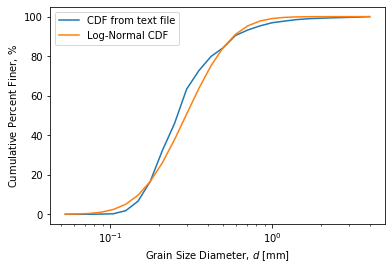

In [12]:
import matplotlib.pyplot as plt
# Use Eq. 2.2 to calculate f(phi)
y=[0]*len(ps)
index = 0
for value in ps:
    y[index] = 1/(phi_stdev*(2*pi)**(0.5))*math.exp(-(value-phi_mean)**2/(2*phi_stdev**2))
    index += 1

# integrate f(phi) using trapezoidal method
dphi = [0]*len(ps)
trap = [0]*len(ps)
ymint = [0]*len(ps)
for i in range(1,len(ps)):
    dphi[i]= ps[i]-ps[i-1]
    trap[i] = 0.5*(y[i]+y[i-1])
    ymint[i] = dphi[i]*trap[i]*100

# create cumulative distribution of integrated f(phi)
ycmint = [0]*len(ymint)
ycmintinv = [0]*len(ymint)
for j in range(1,len(ymint)):
    ycmint[j] = ycmint[j-1]+ymint[j]
    ycmintinv[j] = 100-ycmint[j]
ycmintinv[0] = 100

# plot the distributions
fig,ax = plt.subplots()
plt.xscale('log')
plt.plot((gs), 100-cpc, label = 'CDF from text file')
plt.plot((gs), (ycmintinv), label = 'Log-Normal CDF')
plt.legend()
ax.set_xlabel('Grain Size Diameter, $d$ [mm]')
ax.set_ylabel('Cumulative Percent Finer, $\%$');

In [18]:
# calculate R^2 value using function from sklearn
from sklearn.metrics import r2_score
r2 = r2_score(100-cpc,ycmintinv)
#print('R-Squared Function: ', round(r2,3))

# calculate R^2 value manually for fun
ss_res = sum(((100-cpc)-ycmintinv)**2)
ss_tot = sum(((100-cpc)-(sum(100-cpc)/len(100-cpc)))**2)
r2c = 1-ss_res/ss_tot
print('R-Squared of Log-Normal CDF fit: ', round(r2c,3))


R-Squared of Log-Normal CDF fit:  0.991


As shown in the above figure, the log-normal CDF underpredicts the grain size diameters at the extremes of the distribution, while overpredicting the grain size diameter in the mid-range of the distribution (about 20 to 80 percentiles). The high $R^2$ value of 0.991 allows us to say with high confidence that the grain size for this sample is log-normally distributed. 

### c) Using the fall velocity Eq. 2.11 and the approximation for a sphere's drag coefficient given by Eq. 2.13, plot the fall velocity ($cm/s$) in seawater versus percent finer than. Show sample calculations for d=0.5 $mm$. Discuss your results, including the implications of approximations made in the analysis.

The equations shown in the sample calculations section below were used to calculate the fall velocity, drag coefficient, and Reynold's number. These equations were solved iteratively for each grain size diameter in the given distribution using a simple for loop and if statement to check to error convergence. The calculations are shown in the code block below with the functions and parameters defined.

In [31]:
#define functions
# terminal velocity function
def termvelo(SG_s, g, d, C_D):
    w = ((4*(SG_s-1)*g*d)/(3*C_D))**(0.5)
    return w
# drag coefficient function
def dragco(Re):
    #if Re < 100:
    C_D = 24/Re*(1+(3*Re/16))**(0.5)
    #else:
    #C_D = 24/Re*(1+(3*Re/16))
    return C_D
# reynolds number function
def reynolds(rho_w, w, d, mu):
    Re = rho_w*w*d/mu
    return Re

#define parameters
SG_s = 2.65 #specific gravity for quartz
g = 9.81 #gravitational accel in m/s**2
rho_w = 1030 #density of seawater in kg/m**3 at 15.6 degC and 35 ppt from Fundamentals of Fluid Mechanics by Munson et al.
mu = 1.2*10**(-3) #dynamic viscoity of water in N*s/m**2 rom Fundamentals of Fluid Mechanics by Munson et al.

#initiate iterative routine
fall_velo = [0]*len(gs)
fvindex = 0
for d in gs/1000: #for each diameter in the grain size distribution
    iteration = 0
    initial_guess = 10
    C_D = initial_guess
    lbreak = True
    while lbreak == True: #solve the w,Re,and C_D equations
        previous_guess = C_D
        w = termvelo(SG_s, g, d, C_D)
        Re = reynolds(rho_w, w, d, mu)
        C_D = dragco(Re)
        error = abs(C_D-previous_guess)
        if (error <= 0.0001) or (error == 0): #break routine when error limit is exceeded
            lbreak = False
        iteration += 1

    fall_velo[fvindex] = w #assign converged solution to array
    fvindex += 1


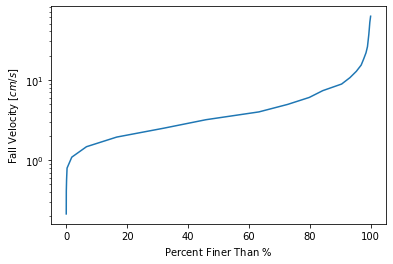

In [36]:
#plot solution in cm/s vs. PFT
fvcm = np.array(fall_velo)*100
pft = 100-cpc
fig1,ax1 = plt.subplots()
plt.yscale('log')
plt.plot(pft, fvcm, label = 'fall veloity')
ax1.set_xlabel('Percent Finer Than $\%$')
ax1.set_ylabel('Fall Velocity [$cm/s$]');

#### 2c) Sample Calculations

#### Terms:

$d$: diameter

$w$: fall velocity

$g$: gravitational acceleration

$SG_s$: specific gravity of sediment

$C_D$: drag coefficient

$Re$: Reynolds number

$\rho_w$: density of seawater

$\mu$: dynamic viscosity

#### Equations:



$$w = \sqrt{\frac{4(SG_s-1)gd}{3 C_D}}$$

$$Re = \frac{\rho_wwd}{\mu}$$

$$C_D = \frac{24}{Re}\sqrt{1+\frac{3*Re}{16}}$$

#### Iteration 1:

Error Tolerance: 0.1

$C_D$ initial guess: 10

$d$ = 0.5 [$mm$]

$$w = \sqrt{\frac{4*(2.65-1)*9.81[m/s^2]*0.5[mm] / 1000[mm/m]}{3 *10}} = 0.0328 [m/s]$$

$$Re = \frac{1000[kg/m^3]*0.0328[m/s]*0.5[mm]/1000[mm/m]}{1.12*10^{-3}[N*s/m^2]} = 14.64$$

$$C_D = \frac{24}{14.6}\sqrt{1+\frac{3*14.6}{16}} = 3.17$$

$$C_D error = \vert{10-3.17}\vert = 6.83$$

Error is greater than error tolerance. Therefore, proceed to iteration 2 using new value of $C_D$.

#### Iteration 2:

$C_D$ initial guess: 3.17

$$w = \sqrt{\frac{4*(2.65-1)*9.81[m/s^2]*0.5[mm] / 1000[mm/m]}{3 *3.17}} = 0.0583 [m/s]$$

$$Re = \frac{1000[kg/m^3]*0.0583[m/s]*0.5[mm]/1000[mm/m]}{1.12*10^{-3}[N*s/m^2]} = 26.03$$

$$C_D = \frac{24}{26.03}\sqrt{1+\frac{3*26.03}{16}} = 2.24$$

$$C_D error = \vert{3.17-2.24}\vert = 0.93$$

Error is greater than error tolerance. Therefore, proceed to iteration 3 using new value of $C_D$.

#### Iteration 3:

$C_D$ initial guess: 2.24

$$w = \sqrt{\frac{4*(2.65-1)*9.81[m/s^2]*0.5[mm] / 1000[mm/m]}{3 *2.24}} = 0.0694 [m/s]$$

$$Re = \frac{1000[kg/m^3]*0.0694[m/s]*0.5[mm]/1000[mm/m]}{1.12*10^{-3}[N*s/m^2]} = 30.98$$

$$C_D = \frac{24}{30.98}\sqrt{1+\frac{3*30.98}{16}} = 2.02$$

$$C_D error = \vert{3.17-2.02}\vert = 0.22$$

Error is greater than error tolerance. Therefore, proceed to iteration 3 using new value of $C_D$.

#### Iteration 4:

$C_D$ initial guess: 2.02

$$w = \sqrt{\frac{4*(2.65-1)*9.81[m/s^2]*0.5[mm] / 1000[mm/m]}{3 *2.02}} = 0.0731 [m/s]$$

$$Re = \frac{1000[kg/m^3]*0.0731[m/s]*0.5[mm]/1000[mm/m]}{1.12*10^{-3}[N*s/m^2]} = 32.63$$

$$C_D = \frac{24}{32.63}\sqrt{1+\frac{3*32.63}{16}} = 1.96$$

$$C_D error = \vert{2.02-1.96}\vert = 0.06$$

Error is less than error tolerance. Print converged solution.

Fall Velocity, $w$: 0.0731 [$m/s$]

#### 2c) Discussion

As expected, the results show that the fall (terminal) velocity increases as the percent finer than (or grain size) increases; however, this relationship is highly non-linear. The fall velocity increases rapidly for the smaller diameter grain sizes, increasing almost 1 order of magnitude over the first  20% of the percent finer than (PFT) scale. The terminal velocity then gradually increases from about 0.1 $cm/s$ to 0.15 $cm/s$ between 20% and 80% PFT. The last 20% of the PFT scale, the fall velocity resumes a rapid increase as the grain sizes become larger. Approximations such as the equation used to calculate the drag coefficient based on the Reynolds number could have an impact on the solution. However, since the Reynolds number is less than 100 for the final solution, the $C_D$ equation used is an appropriate approxiation.

## Problem 3

Quartz sand with porosity, $p$ = 0.32, is dredged (removed from the sea bottom) for a beach nourishment project. A bathymetric survey shows that 71,000 $m^3$ were excavated from the sea bottom. Once placed on the beach, the sand porosity initially is $p$ = 0.45. What sand volume was placed on the beach?

The following equation is used to solve: $$W = \rho_sg(1-p)V$$

The weight of the sediment is calculated using the in-situ volume and porosity values. Then, using the calculated sediment weight, the volume of placed sand is calculated using the changed porosity value. The codeblock below shows the calculations.

In [37]:
# Define parameters
SG_quartz = 2.65 # specific gravity quartz
rho_quartz = SG_quartz*rho_w # density of quartz
p_insitu = 0.32 # in-situ porosity
v_insitu = 71000 # in-situ volume m^3
p_placed = 0.452 # placed porosity

# Calculate W in-situ
W_insitu = rho_quartz*g*(1-p_insitu)*v_insitu
print('In Situ Weight of Sand Grains: ', W_insitu, ' N')

# Calculate Volume placed
V_placed = W_insitu/(rho_quartz*g*(1-p_placed))
print('Volume of Sand Placed on Beach: ', round(V_placed), ' cubic meters')

In Situ Weight of Sand Grains:  1292764350.6  N
Volume of Sand Placed on Beach:  88102  cubic meters
